In [40]:
#Standaard imports
import pandas as pd 
import csv
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sc

#Voor RFC en classificatie
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.manifold import TSNE
from scipy.stats import f_oneway
from matplotlib.colors import LogNorm


#Voor visualisatie
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import seaborn as sns

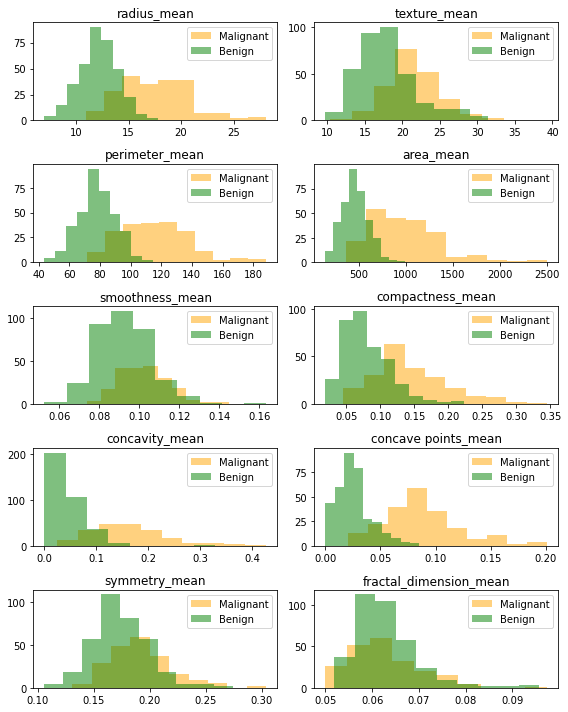

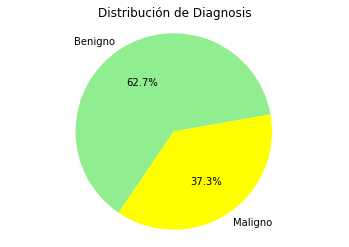

In [18]:
#Importing data and plotting the distribution of the different features agains the 2 possible  classifications (benign and malign)

input_file = 'cancer_data.csv'

df = pd.read_csv(input_file)
let_to_num = {'M':1,"B":0}

df['diagnosis'] = df['diagnosis'].map(let_to_num)
malignant = df[df['diagnosis']==1]
benign = df[df['diagnosis']==0]

variables = list(df.columns[2:12]) #Here we can change the features weare plotting


fig,axes = plt.subplots(nrows=len(variables)//2,ncols = 2, figsize=(8,10))
axes = axes.ravel()


for var, ax in enumerate(axes):
    ax.hist(malignant[variables[var]], color='orange', alpha=0.5, label='Malignant')
    ax.hist(benign[variables[var]], color='green', alpha=0.5, label='Benign')
    ax.set_title(variables[var])
    ax.legend()
plt.tight_layout()
plt.show()

diagnosis_counts = df['diagnosis'].value_counts()
labels = ['Benigno', 'Maligno']
colors = ['lightgreen', 'yellow']
plt.pie(diagnosis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=10)
plt.axis('equal') 
plt.title('Distribución de Diagnosis')
plt.show()


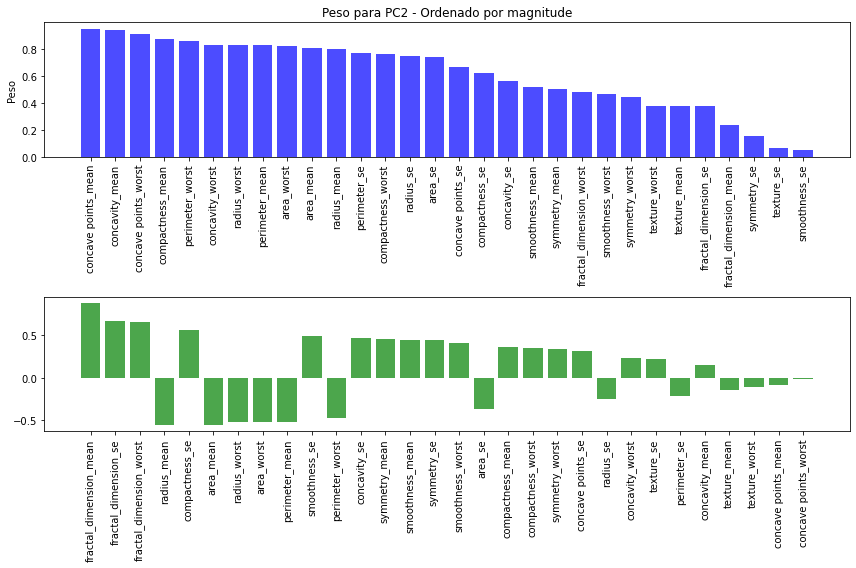

In [19]:
#Plotting the loading plots for the PCA analysis
df = df.drop(columns=['Unnamed: 32'])

df_no_missing = df.dropna()

features = df_no_missing.drop('diagnosis', axis=1) # Omitir la columna 'diagnosis'
numeric_features = features.select_dtypes(include=['float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)


pca = PCA(n_components=2)  # Puedes ajustar el número de componentes
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['diagnosis'] = df_no_missing['diagnosis']

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to hold the loadings
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numeric_features.columns)

# Sort features by the magnitude of loadings for PC1
sorted_features_pc1 = loading_df['PC1'].abs().sort_values(ascending=False).index
loading_df_pc1 = loading_df.loc[sorted_features_pc1]

# Sort features by the magnitude of loadings for PC2
sorted_features_pc2 = loading_df['PC2'].abs().sort_values(ascending=False).index
loading_df_pc2 = loading_df.loc[sorted_features_pc2]

# Create separate loading plots for PC1 and PC2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot for PC1
ax1.bar(range(len(loading_df_pc1)), loading_df_pc1['PC1'], alpha=0.7, color='b')
ax1.set_xticks(range(len(loading_df_pc1)))
ax1.set_xticklabels(loading_df_pc1.index, rotation=90)
ax1.set_ylabel('Peso')
ax1.set_title('Peso para PC1 - Ordenado por magnitude')

# Plot for PC2
ax2.bar(range(len(loading_df_pc2)), loading_df_pc2['PC2'], alpha=0.7, color='g')
ax2.set_xticks(range(len(loading_df_pc2)))
ax2.set_xticklabels(loading_df_pc2.index, rotation=90)
ax1.set_ylabel('Peso')
ax1.set_title('Peso para PC2 - Ordenado por magnitude')

plt.tight_layout()
plt.savefig("Loading_Plots_Separate.png")
plt.show()

In [30]:
#La métrica que se utiliza es el accuracy

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
  
    predictions = model.predict(data[predictors])
  
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    kf = KFold(n_splits=5)
    error = []
    
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:])
    
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
    
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    model.fit(data[predictors],data[outcome]) 
    return

In [31]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [37]:
predictor_var = variables
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 91.457%
Cross-Validation Score : 91.250%
Cross-Validation Score : 91.875%
Cross-Validation Score : 92.917%
Cross-Validation Score : 91.839%
Cross-Validation Score : 91.446%


C:\Users\Alex van Tol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alex van Tol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [39]:
predictor_var = variables
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.625%
Cross-Validation Score : 88.750%
Cross-Validation Score : 88.714%
Cross-Validation Score : 88.187%


In [35]:
predictor_var = variables
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 94.975%
Cross-Validation Score : 88.750%
Cross-Validation Score : 89.375%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.918%
Cross-Validation Score : 91.215%


In [42]:
predictor_var = variables
outcome_var='diagnosis'

X_train, X_test, y_train, y_test = train_test_split(df[variables], df[outcome_var], test_size = 0.3)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Mejores Hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.9181286549707602
